In [5]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [6]:
!kaggle datasets download -d ketangangal/heart-disease-dataset-uci

Dataset URL: https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci
License(s): CC0-1.0
  0% 0.00/9.24k [00:00<?, ?B/s]
100% 9.24k/9.24k [00:00<00:00, 9.79MB/s]


In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df1=pd.read_csv("/content/heart_disease_data.csv")

In [45]:
df1.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


<Axes: >

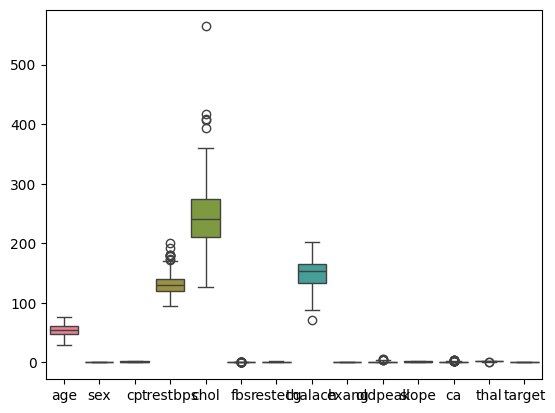

In [46]:
sns.boxplot(data=df1)

In [47]:
df1.isnull().values.any()

False

In [48]:
df1.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [49]:
# Separating data and label
x=df1.drop(columns='target',axis=1)
y=df1['target']
print(x)
print(y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [50]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)
print(x.shape,xtrain.shape,xtest.shape)#20% test 80% train

(303, 13) (242, 13) (61, 13)


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Train the model
model_l = LogisticRegression()
model_l.fit(xtrain, ytrain)

# Predictions
y_train_pred = model_l.predict(xtrain)
y_test_pred = model_l.predict(xtest)

# Accuracy
train_accuracy = accuracy_score(ytrain, y_train_pred)
test_accuracy = accuracy_score(ytest, y_test_pred)

# Precision, Recall, and F1-Score
precision = precision_score(ytest, y_test_pred, average='weighted')  # Use 'macro' for equal class weighting
recall = recall_score(ytest, y_test_pred, average='weighted')
f1 = f1_score(ytest, y_test_pred, average='weighted')

# Confusion Matrix
conf_matrix = confusion_matrix(ytest, y_test_pred)

# ROC-AUC Score (only for binary classification)
roc_auc = roc_auc_score(ytest, y_test_pred) if len(set(ytest)) == 2 else "Not applicable for multi-class"

# Print the metrics
print(f'Accuracy on Training Data: {train_accuracy:.4f}')
print(f'Accuracy on Test Data: {test_accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'ROC-AUC Score: {roc_auc}')


Accuracy on Training Data: 0.8471
Accuracy on Test Data: 0.8033
Precision: 0.8126
Recall: 0.8033
F1 Score: 0.7997
Confusion Matrix:
[[19  9]
 [ 3 30]]
ROC-AUC Score: 0.7938311688311689


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
import joblib
joblib.dump(model_l,"Heart_disease_model.pkl")

['Heart_disease_model.pkl']